# **Agriculture Trend Analysis Using Machine Learning**
### **DSP Group Assignment - Group 7**
This notebook explores agriculture trends using machine learning techniques. The workflow includes:
- Data loading and preprocessing
- Exploratory Data Analysis (EDA)
- Model training and evaluation
- Results visualization

---


## **Importing Required Libraries**
We begin by importing essential libraries for data processing, visualization, and machine learning.

In [1]:
!pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
print(sys.executable)


C:\Users\Sushreet\AppData\Local\Programs\Python\Python313\python.exe


In [3]:
!C:\Users\User\AppData\Local\Programs\Python\Python312\python.exe -m pip install xgboost --user

The system cannot find the path specified.


In [4]:
import xgboost
print(xgboost.__version__)

2.1.4


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression

## **Loading the Dataset**
We load the dataset into a Pandas DataFrame and display its structure to understand the data better.

In [6]:
file_path = r"C:\Users\Sushreet\Documents\dsp project\agricultureTrend.csv"
df = pd.read_csv(file_path)

## **Exploratory Data Analysis (EDA)**
We will now explore the dataset to identify missing values, understand feature distributions, and detect potential outliers.
- **Dataset Information:** Column types, missing values, and size.
- **First 5 Rows:** Preview of the dataset.
- **Statistical Summary:** Descriptive statistics of numerical columns.

In [7]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5274 entries, 0 to 5273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5274 non-null   object 
 1   Domain            5274 non-null   object 
 2   Area Code (M49)   5274 non-null   int64  
 3   Area              5274 non-null   object 
 4   Element Code      5274 non-null   int64  
 5   Element           5274 non-null   object 
 6   Item Code (CPC)   5274 non-null   object 
 7   Item              5274 non-null   object 
 8   Year Code         5274 non-null   int64  
 9   Year              5274 non-null   int64  
 10  Unit              5274 non-null   object 
 11  Value             5274 non-null   float64
 12  Flag              5274 non-null   object 
 13  Flag Description  5274 non-null   object 
 14  Note              1360 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 618.2+ KB


None

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5910,Export quantity,01341,Apples,2015,2015,t,32400.00,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export value,01341,Apples,2015,2015,1000 USD,15918.00,A,Official figure,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5610,Import quantity,01341,Apples,2016,2016,t,92335.56,X,Figure from international organizations,Estimated data using trading partners database
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import value,01341,Apples,2016,2016,1000 USD,31176.00,X,Figure from international organizations,Estimated data using trading partners database
4,TCL,Crops and livestock products,4,Afghanistan,5910,Export quantity,01341,Apples,2016,2016,t,61526.03,I,Imputed value,NaN


## **Preprocessing:**

### Check for missing values

### Dropping 'Note' column:
Dropping 'Note' column as it has many missing values

In [8]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [9]:
# Drop irrelevant columns
df.drop(columns=['Note'], inplace=True, errors='ignore')

### Creating a target column

High_trade: 1 if value>median, else 0

In [10]:
median_value= df['Value'].median()
df['High_trade']= (df['Value'] > df['Value'].median()).astype(int)

df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,High_trade
0,TCL,Crops and livestock products,4,Afghanistan,5910,Export quantity,01341,Apples,2015,2015,t,32400.00,A,Official figure,1
1,TCL,Crops and livestock products,4,Afghanistan,5922,Export value,01341,Apples,2015,2015,1000 USD,15918.00,A,Official figure,1
2,TCL,Crops and livestock products,4,Afghanistan,5610,Import quantity,01341,Apples,2016,2016,t,92335.56,X,Figure from international organizations,1
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import value,01341,Apples,2016,2016,1000 USD,31176.00,X,Figure from international organizations,1
4,TCL,Crops and livestock products,4,Afghanistan,5910,Export quantity,01341,Apples,2016,2016,t,61526.03,I,Imputed value,1


### Summary statistics

In [11]:
print(df.describe(include='all'))

       Domain Code                        Domain  Area Code (M49)  \
count         5274                          5274      5274.000000   
unique           1                             1              NaN   
top            TCL  Crops and livestock products              NaN   
freq          5274                          5274              NaN   
mean           NaN                           NaN       240.833523   
std            NaN                           NaN       218.973191   
min            NaN                           NaN         4.000000   
25%            NaN                           NaN        50.000000   
50%            NaN                           NaN       144.000000   
75%            NaN                           NaN       462.000000   
max            NaN                           NaN       586.000000   

                 Area  Element Code       Element Item Code (CPC)      Item  \
count            5274   5274.000000          5274            5274      5274   
unique       

## **Data Distribution: Histogram**
A histogram helps visualize the distribution of numerical data. This can help identify:
- Skewness (left or right skew)
- Outliers
- Most frequent value ranges

We will plot a histogram for the feature `Value` to analyze its distribution.

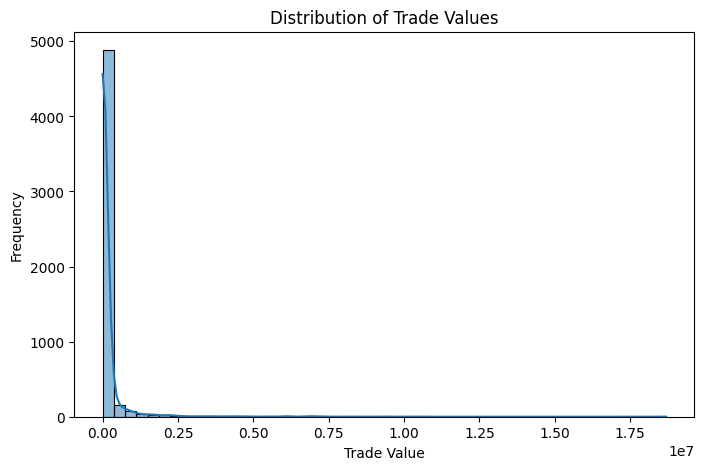

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title("Distribution of Trade Values")
plt.xlabel("Trade Value")
plt.ylabel("Frequency")
plt.show()

## **Bar Plot for Count of Import/Export Elements**

This bar plot represents the count of different **Import/Export elements** in the dataset.  

### **Observations:**
1. Some elements have significantly higher counts than others.
2. The distribution is not uniform, indicating some elements are more frequent in trade.
3. The x-axis labels are rotated for better readability.

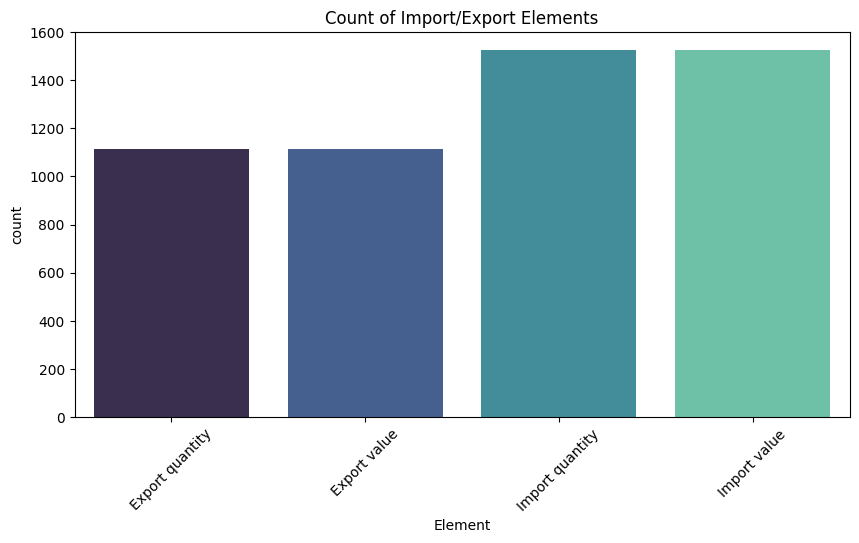

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Element'], hue=df['Element'], palette='mako', legend=False)
plt.title("Count of Import/Export Elements")
plt.xticks(rotation=45)
plt.show()

## **7. Feature Correlation: Heatmap**
A correlation heatmap shows how numerical features relate to one another:
- Values close to **1** indicate a strong positive correlation.
- Values close to **-1** indicate a strong negative correlation.
- Values around **0** mean no correlation.

This helps in **feature selection** and **understanding relationships**.

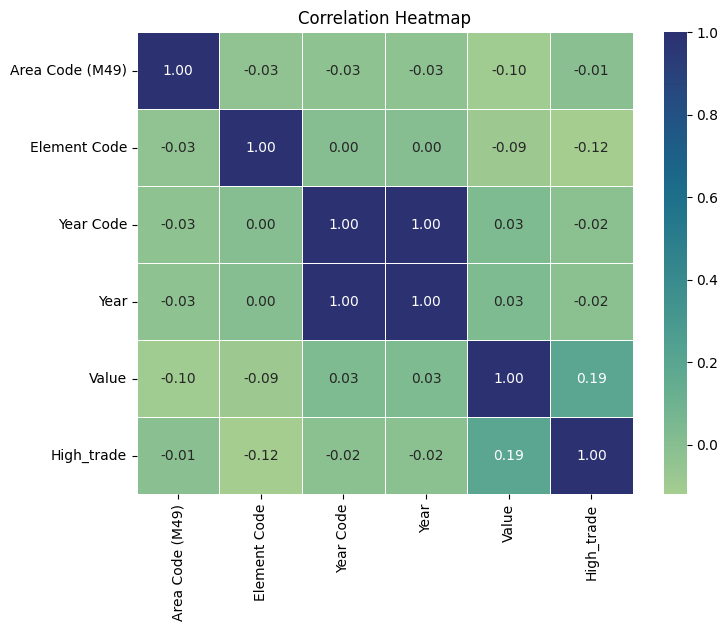

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='crest', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## **Count of High vs Low Trade**

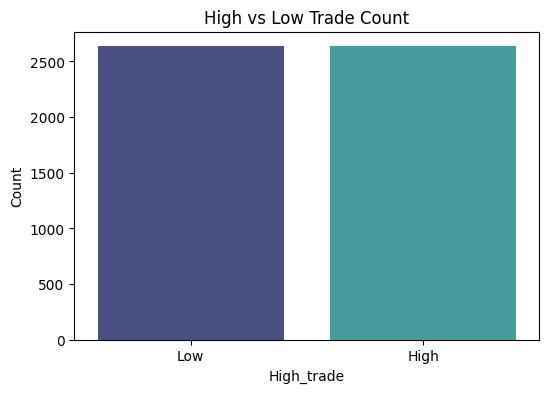

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['High_trade'], hue=df['High_trade'], palette='mako', legend=False)
plt.title("High vs Low Trade Count")
plt.xticks([0, 1], ["Low", "High"])
plt.ylabel("Count")=
plt.show()

## **Time Series Trend**

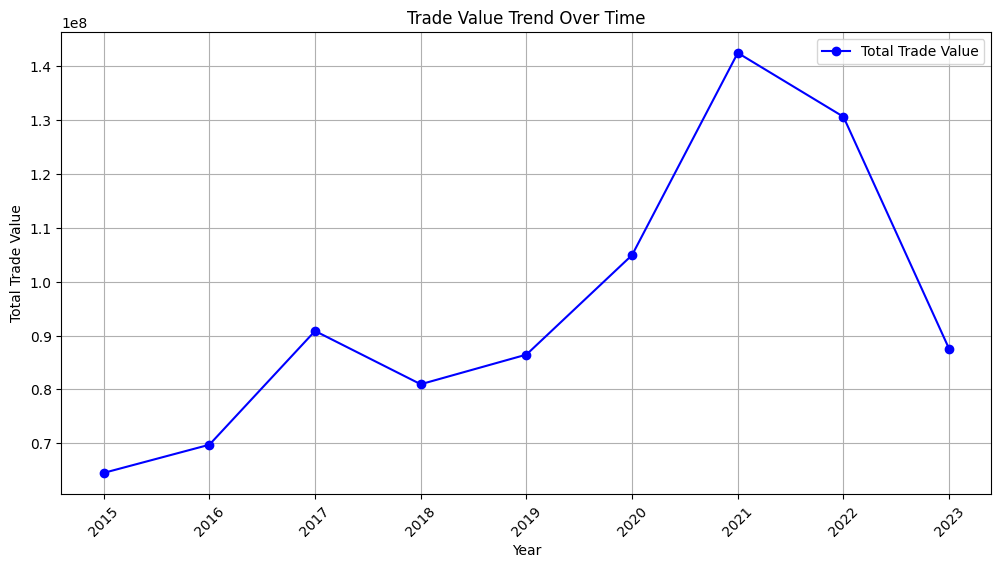

In [16]:
# Aggregate trade values per year
trade_trend = df.groupby('Year Code')['Value'].sum()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(trade_trend.index, trade_trend.values, marker='o', linestyle='-', color='b', label="Total Trade Value")
plt.xlabel("Year")
plt.ylabel("Total Trade Value")
plt.title("Trade Value Trend Over Time")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

## **Identifying Outliers: Boxplot**
A boxplot helps visualize outliers and data spread:
- The **box** represents the interquartile range (middle 50% of data).
- **Whiskers** show variability outside the middle 50%.
- **Points outside whiskers** are potential outliers.

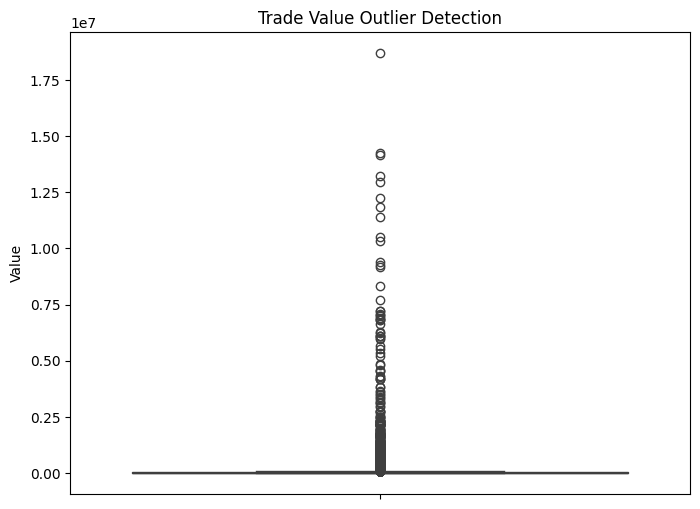

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="Value" )
plt.title("Trade Value Outlier Detection")
plt.show()

## **Country-Wise Trade Value Analysis**

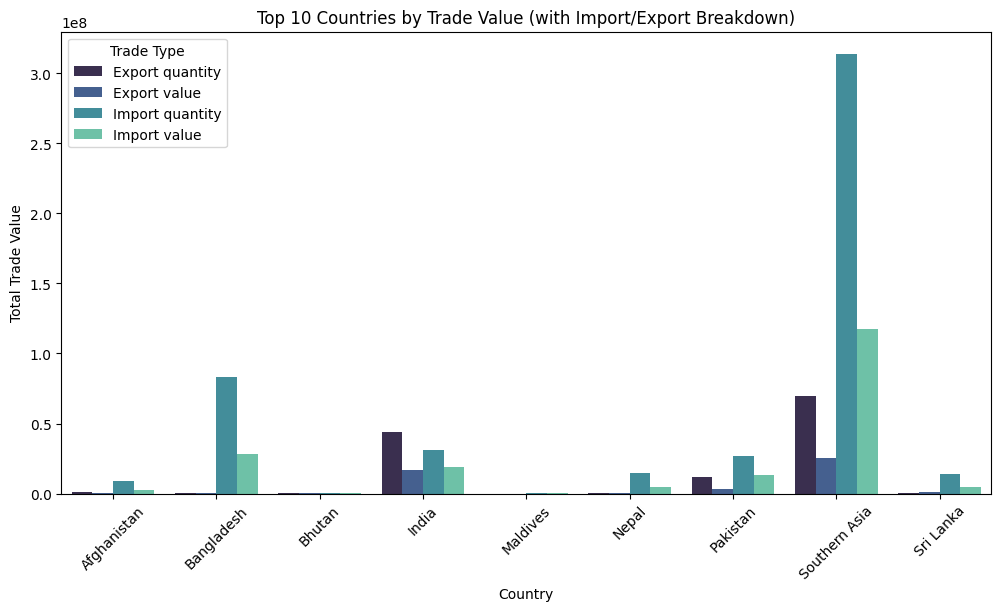

In [18]:
# Group by 'Area' and 'Element' to get trade values
top_countries = df.groupby(['Area', 'Element'])['Value'].sum().reset_index()

# Select the top 10 countries based on total trade value
top_areas = top_countries.groupby('Area')['Value'].sum().nlargest(10).index
top_countries = top_countries[top_countries['Area'].isin(top_areas)]

# Bar plot with hue for 'Element' (Import/Export)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Area', y='Value', hue='Element', palette='mako')

plt.xticks(rotation=45)
plt.title("Top 10 Countries by Trade Value (with Import/Export Breakdown)")
plt.ylabel("Total Trade Value")
plt.xlabel("Country")
plt.legend(title="Trade Type")
plt.show()

## **Distribution of Trade Value Over Different Products**


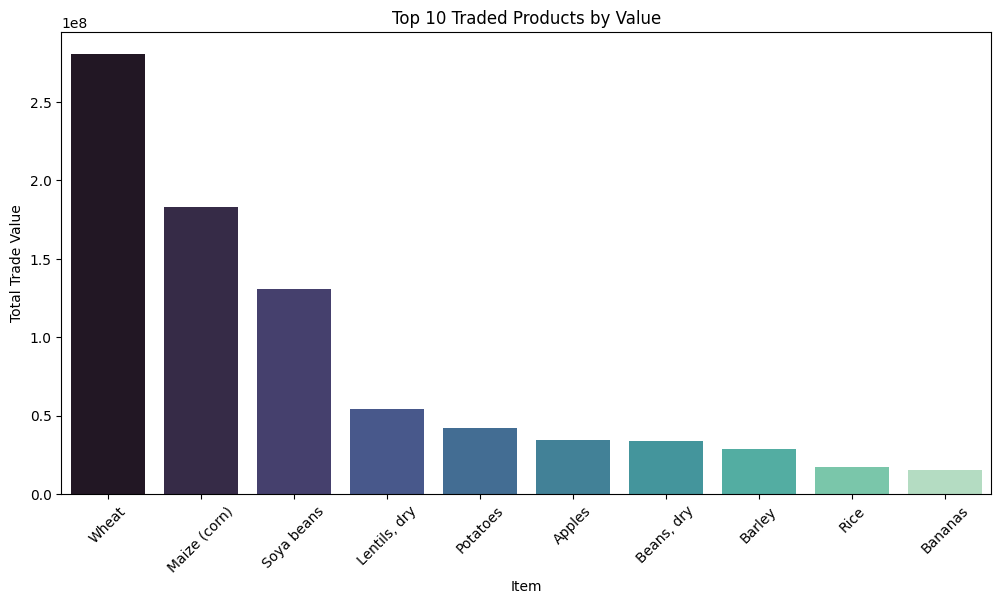

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = df.groupby('Item')['Value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, hue=top_products.index, palette='mako', legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Traded Products by Value")
plt.ylabel("Total Trade Value")
plt.show()

## **Pairwise Relationship: Pairplot**
A pairplot shows scatterplots for multiple numerical features. This helps:
- Identify relationships between variables.
- Detect clusters or trends in data.
- Spot potential collinearity between features.

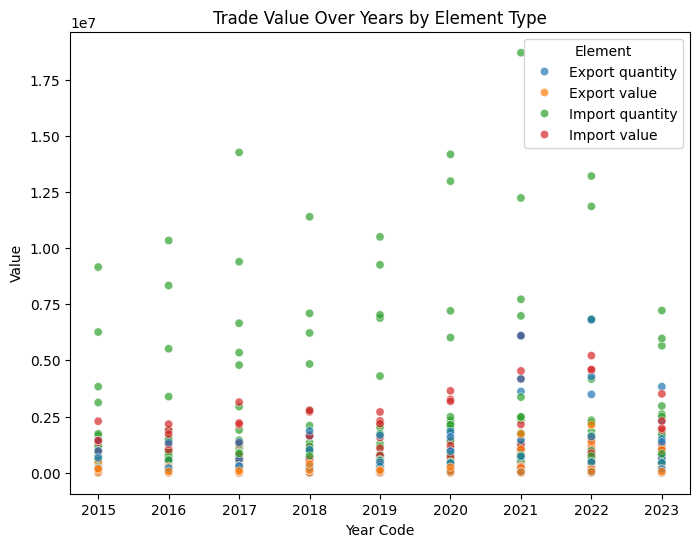

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Year Code", y="Value", hue="Element", alpha=0.7)
plt.title("Trade Value Over Years by Element Type")
plt.show()

## **Encoding Categorical Variables**

In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## **Feature Engineering - Creating Efficiency Score**

In [22]:
df['efficiency_score'] = df['Value'] / (df['Value'].median() + 1)

## **4. Machine Learning Model Training**
We will train **Regression Models** to predict trends based on the given dataset. The following steps will be performed:
1. Data Preprocessing
2. Splitting Data into Training and Testing Sets
3. Model Training
4. Model Evaluation

In [28]:
X_reg = df.drop(columns=['Value'])
y_reg = df['Value']

## **Train-Test Split for Regression**

In [29]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

## **Feature Scaling**

In [30]:
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

## **Regression Models**

In [31]:
regressors = {
    "XGBoost Regressor": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in regressors.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    r2 = r2_score(y_test_reg, y_pred)
    mae = mean_absolute_error(y_test_reg, y_pred)
    mse = mean_squared_error(y_test_reg, y_pred)
    print(f"{name} R2 Score: {r2:.2%}")
    print(f"Mean Absolute Error: {mae:.4f}, Mean Squared Error: {mse:.4f}")

XGBoost Regressor R2 Score: 93.69%
Mean Absolute Error: 32166.1490, Mean Squared Error: 80495775962.8151
Random Forest Regressor R2 Score: 97.30%
Mean Absolute Error: 11342.8632, Mean Squared Error: 34477893919.5260


## **Cross-Validation for Model Evaluation**
We have used K- fold cross- validation.

### **Implementation**
We use `cross_val_score` from `sklearn.model_selection` to evaluate regressors (`XGBoost`, `Random Forest`) using **R² score, Mean Absolute Error (MAE), and Mean Squared Error (MSE)**.

- **R² Score:** Measures how well the model explains variance (1 = perfect fit, 0 = no predictive power).
- **MAE:** Measures the average absolute error between predictions and actual values.
- **MSE:** Measures the squared difference between predictions and actual values (penalizes large errors more heavily).


In [32]:
for name, model in regressors.items():
    r2_scores = cross_val_score(model, X_reg, y_reg, cv=5, scoring='r2')
    mae_scores = cross_val_score(model, X_reg, y_reg, cv=5, scoring=make_scorer(mean_absolute_error))
    mse_scores = cross_val_score(model, X_reg, y_reg, cv=5, scoring=make_scorer(mean_squared_error))

    print(f"{name} Average R² Score: {r2_scores.mean():.2%}")
    print(f"Average Mean Absolute Error: {mae_scores.mean():.4f}")
    print(f"Average Mean Squared Error: {mse_scores.mean():.4f}\n")

XGBoost Regressor Average R² Score: 91.99%
Average Mean Absolute Error: 34228.3171
Average Mean Squared Error: 158936511183.7216

Random Forest Regressor Average R² Score: 96.77%
Average Mean Absolute Error: 15568.5498
Average Mean Squared Error: 87301187679.5777



## **Clustering - Grouping Countries Based on Trade Behavior**

### **Standardize the Data**
Since trade values and other economic indicators usually have large variations, applying `StandardScaler` ensures that no single feature dominates the PCA transformation.

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['Value']))

### **Applying PCA for Dimensionality Reduction**

In [34]:
pca = PCA(n_components=5)
X_cluster = pca.fit_transform(X_scaled)  

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.19876603 0.16139044 0.13785663 0.12825881 0.08336657]
Total Variance Captured: 0.7096384770950128


### **Using Elbow Method**

Before running K-Means, it's best to find the optimal cluster number using the `Elbow Method`.

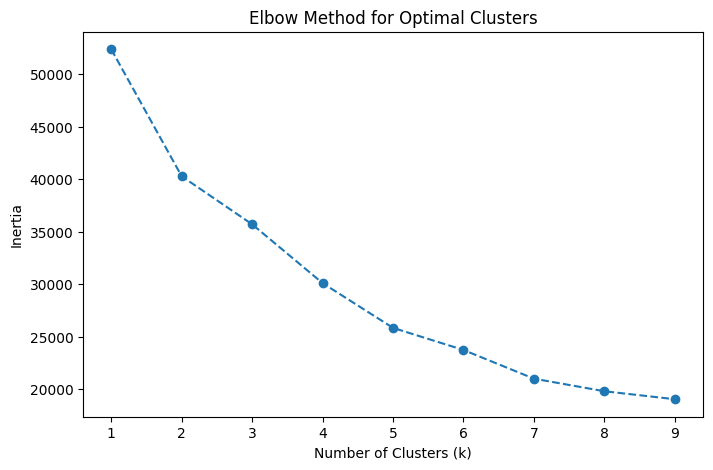

In [35]:
inertia = []
for k in range(1, 10):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

### **Applying K-Means Clustering**

In [36]:
optimal_clusters = 3  

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[-1.04933008 -0.42108598  0.13236123  0.28229381 -0.03429108]
 [ 2.58195855 -0.50767717 -0.55239286  0.02633493  0.14235002]
 [ 0.66768014  1.82221744  0.14402809 -0.90546173 -0.03654902]]


### **Analyze the Clusters** 

In [37]:
original_centers = pca.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers in Original Feature Space:\n", original_centers)

Cluster Centers in Original Feature Space:
 [[ 0.00000000e+00  0.00000000e+00  5.41377261e-01  4.34688646e-01
   5.73130062e-02 -3.83754012e-02  3.22747108e-02 -3.58904549e-02
  -1.45352420e-01 -1.45352420e-01 -2.62461910e-02 -6.53022958e-01
   6.40297956e-01 -6.00550475e-03 -9.06933983e-02 -6.00550475e-03]
 [ 0.00000000e+00  0.00000000e+00 -9.22575945e-01 -9.67800280e-01
   1.23651636e-01 -1.50034684e-01  2.55307522e-01  1.01493894e-01
   1.62051852e-01  1.62051852e-01  8.12320578e-02  1.37293887e+00
  -1.17113535e+00 -9.95857403e-01 -2.23988400e-01 -9.95857403e-01]
 [ 0.00000000e+00  0.00000000e+00 -7.56782156e-01 -3.79065629e-01
  -3.02941318e-01  2.70539688e-01 -3.57532910e-01  9.56458294e-03
   2.89414992e-01  2.89414992e-01 -6.41838819e-05  6.50977683e-01
  -8.14532224e-01  1.02132406e+00  5.07892912e-01  1.02132406e+00]]


### **Check Cluster Assignments**

In [38]:
df['Cluster'] = kmeans.labels_
df.groupby('Cluster').mean()  

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,High_trade,efficiency_score,high_trade_value
Cluster,,,,,,,,,,,,,,,,,
0,0.0,0.0,355.016537,5.174415,5751.049610,1.606240,9.902340,9.800312,2018.728549,2018.728549,0.493916,67688.245476,0.012168,3.988456,0.50078,51.124052,0.50078
1,0.0,0.0,64.557377,1.862102,5764.171649,1.490839,11.039537,10.341369,2019.476374,2019.476374,0.519769,202.852681,3.682739,0.981678,0.00000,0.153212,0.00000
2,0.0,0.0,63.354651,3.745155,5694.790698,1.975775,8.367248,9.998062,2019.808140,2019.808140,0.499031,621109.873430,2.065891,1.304264,1.00000,469.116219,1.00000


### **Visualize the Clusters**

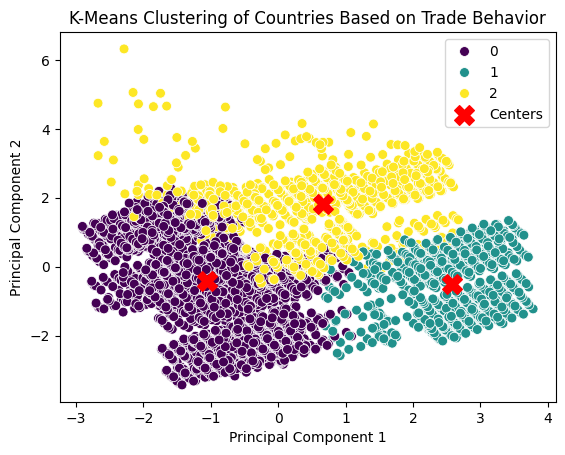

In [39]:
sns.scatterplot(x=X_cluster[:, 0], y=X_cluster[:, 1], hue=df['Cluster'], palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centers')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of Countries Based on Trade Behavior")
plt.legend()
plt.show()

## **Saving and Loading the Trained Model (Joblib)**

In [40]:
import joblib

# Save trained models
joblib.dump(classifiers["XGBoost Classifier"], "xgb_classifier.pkl")
joblib.dump(classifiers["Random Forest Classifier"], "rf_classifier.pkl")
joblib.dump(scaler, "scaler.pkl")

joblib.dump(regressors["XGBoost Regressor"], "xgb_regressor.pkl")
joblib.dump(regressors["Random Forest Regressor"], "rf_regressor.pkl")

print("Models saved successfully!")

Models saved successfully!


In [43]:
import joblib

# Loading the models
xgb_classifier = joblib.load("xgb_classifier.pkl")
rf_classifier = joblib.load("rf_classifier.pkl")
scaler = joblib.load("scaler.pkl")

xgb_regressor = joblib.load("xgb_regressor.pkl")
rf_regressor = joblib.load("rf_regressor.pkl")


print("Shape of test data (X_test_reg):", X_test_reg.shape)  # Checking the number of features in your test data

# Checking the number of features the model expects
print("XGBoost model expected features:", xgb_classifier.n_features_in_)
print("Random Forest model expected features:", rf_classifier.n_features_in_)

# Getting feature importance for both models
xgb_importance = xgb_classifier.feature_importances_
rf_importance = rf_classifier.feature_importances_

print("XGBoost feature importance:", xgb_importance)
print("Random Forest feature importance:", rf_importance)

Shape of test data (X_test_reg): (1055, 16)
XGBoost model expected features: 10
Random Forest model expected features: 10
XGBoost feature importance: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Random Forest feature importance: [7.79095028e-03 2.20706442e-03 3.19342389e-03 2.56928207e-02
 3.08767227e-03 2.26992052e-04 9.90612727e-03 7.85360547e-03
 4.86479352e-01 4.53561992e-01]
